In [1]:
#connect drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
#load data
reviews = pd.read_csv("drive/MyDrive/Colab_Notebooks/Amazon_reviews/data_ready.csv")
reviews = reviews.drop(columns='Unnamed: 0')
reviews.head()

,text,label
0,must have for wow players best expansion for w...,positive
1,good game bought this for my son for his birth...,positive
2,stunningly beatiful but this game lacks one ma...,negative
3,five stars daughter addicted to game,positive
4,awesome game couldnt stop playing it fight nig...,positive


In [5]:
reviews.shape

(617606, 2)

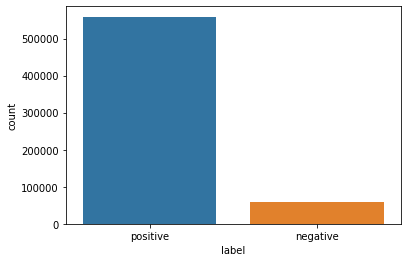

In [6]:
sns.countplot(x='label', data=reviews)

In [7]:
X = reviews.iloc[:, 0].values  
y = reviews.iloc[:, 1].values

In [8]:
processed_reviews = []

for review in range(0, len(X)):  
    # Remove all the special characters
    processed_review = re.sub(r'\W', ' ', str(X[review]))

    # remove all single characters
    processed_review = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_review)

    # Substituting multiple spaces with single space
    processed_review = re.sub(r'\s+', ' ', processed_review, flags=re.I)

    processed_reviews.append(processed_review)


In [9]:
#display the first 5 reviews
processed_reviews[:5]

['must have for wow players best expansion for wow to date in my opinion previously my favorite expansion was burning crusade',
 'good game bought this for my son for his birthday and he liked it lot he definitely recommends this game to anybody who play command and conquer style games',
 'stunningly beatiful but this game lacks one major partweather this game has zero weather change it stays daytime 247 zero cycles zero rain overcast evening storms etc nothing but bright sunny day this adds nothing to the atmosphere of the game found this out the hard way the only way the weather changes is if you encounter the orbs talking to each other done poorly voice acting its da shame when almost the only thing that this game counts on fails to do that wanted to love this game it is breathtaking in scenery and at times surreal and draws you in but there is no dynamic weather so got refund was not worth 1999 thank you',
 'five stars daughter addicted to game',
 'awesome game couldnt stop playing

In [21]:
#create feature vectors containing TF-IDF values
tfidfconverter = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_reviews).toarray()

In [17]:
#split train test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
#train classification model
text_classifier = RandomForestClassifier(n_estimators=50, random_state=42)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [19]:
#making predictions
predictions = text_classifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[  3588   8021]
 [  1104 110809]]
              precision    recall  f1-score   support

    negative       0.76      0.31      0.44     11609
    positive       0.93      0.99      0.96    111913

    accuracy                           0.93    123522
   macro avg       0.85      0.65      0.70    123522
weighted avg       0.92      0.93      0.91    123522

0.9261265199721507
